In [2]:
import torch
import torchvision.transforms as transforms               
from torchvision.datasets import CIFAR10       
from torch.utils.data import DataLoader
import detectors
import timm
from src.temperature_scaling import ModelWithTemperature
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# load fine-tuned model
model = timm.create_model("resnet50_cifar10", pretrained=True)
model.to(device)

# reprocess the images from CIFAR10
data_transform = transforms.Compose([
    transforms.ToTensor(),          # transfer to tensor
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])  # normalize
])
# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

# Temperature Scaling
temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.0).to(device)
model.set_temperature(temp_scal_loader)

model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Files already downloaded and verified
Before temperature - NLL: 0.375, ECE: 0.049
Optimal temperature: 4.909
After temperature - NLL: 0.836, ECE: 0.420


APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9244 ± 0.0036
Final Average Prediction Set Size: 1.08 ± 0.01
Final Average Coverage: 0.9451 ± 0.0052
Final Average Real Probability: 0.9218 ± 0.0054


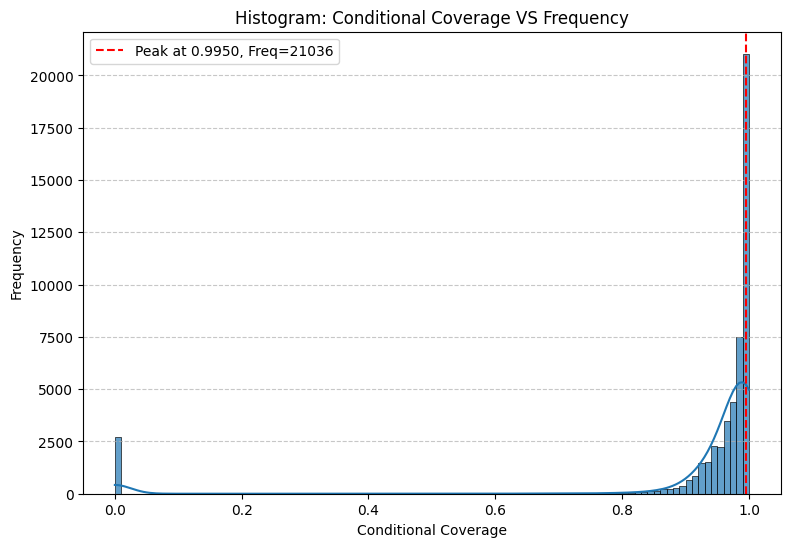

21036 (42.07%) samples reached the peak conditional coverage at 0.9950


In [3]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9263 ± 0.0035
Final Average Prediction Set Size: 0.99 ± 0.01
Final Average Coverage: 0.9448 ± 0.0051
Final Average Real Probability: 0.9122 ± 0.0050


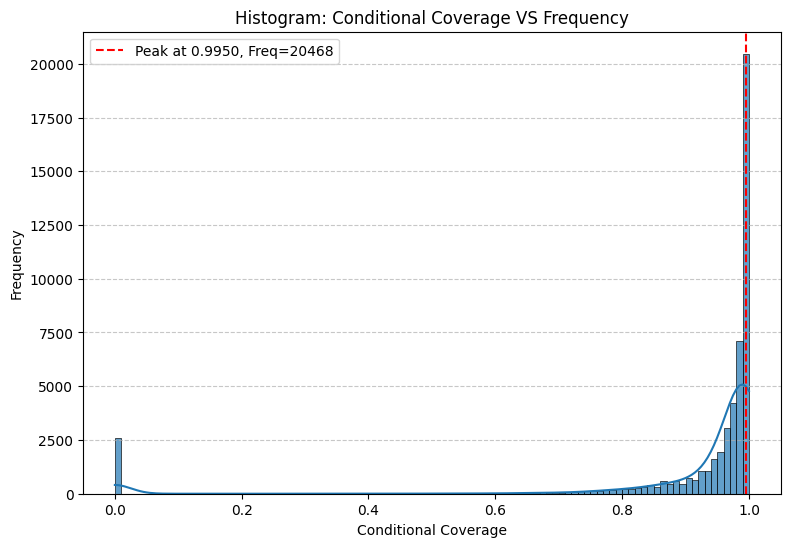

20468 (40.94%) samples reached the peak conditional coverage at 0.9950


In [4]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.1, k_reg=1, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9335 ± 0.0026
Final Average Prediction Set Size: 0.97 ± 0.00
Final Average Coverage: 0.9501 ± 0.0026
Final Average Real Probability: 0.9141 ± 0.0024


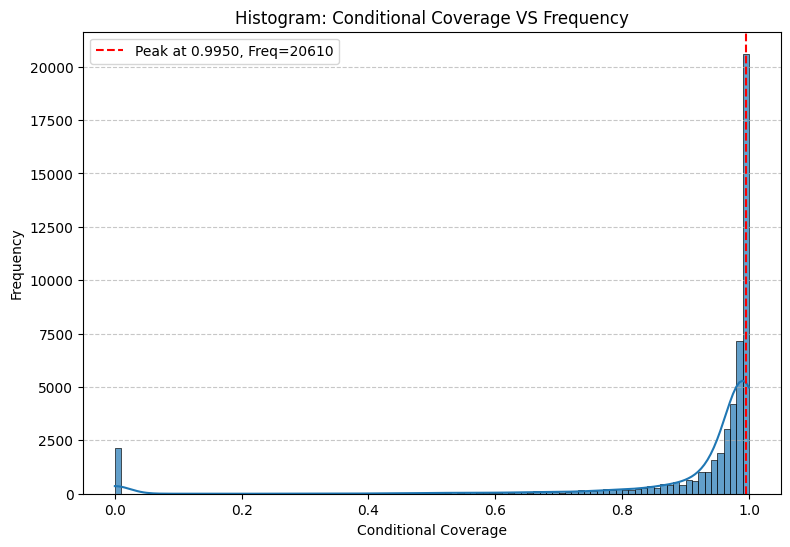

20610 (41.22%) samples reached the peak conditional coverage at 0.9950


In [5]:
saps_cifar10h_hist(model, dataset, device, lambda_=2.0, num_runs=10, alpha=0.05)

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9244 ± 0.0036
Final Average Prediction Set Size: 7.71 ± 0.10
Final Average Coverage: 0.9997 ± 0.0002
Final Average Real Probability: 0.9975 ± 0.0002


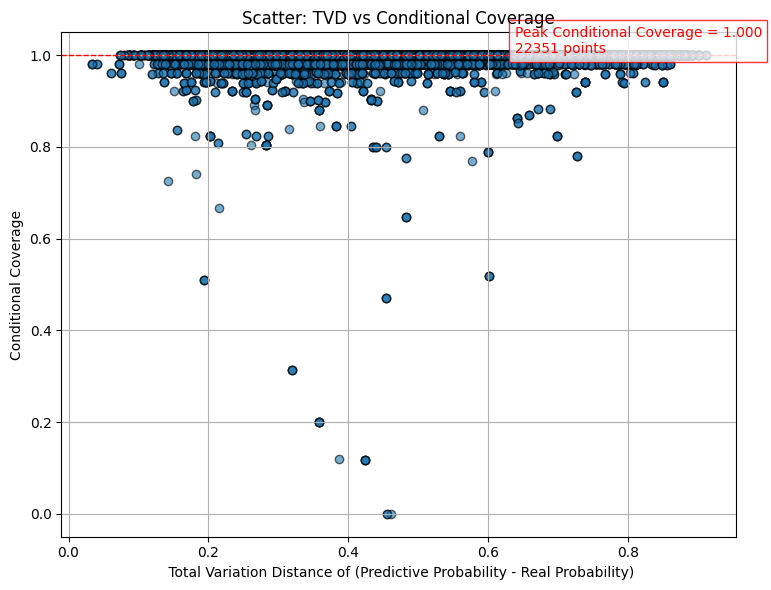

In [6]:
aps_cifar10h_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9263 ± 0.0035
Final Average Prediction Set Size: 2.91 ± 0.02
Final Average Coverage: 0.9904 ± 0.0012
Final Average Real Probability: 0.9736 ± 0.0012


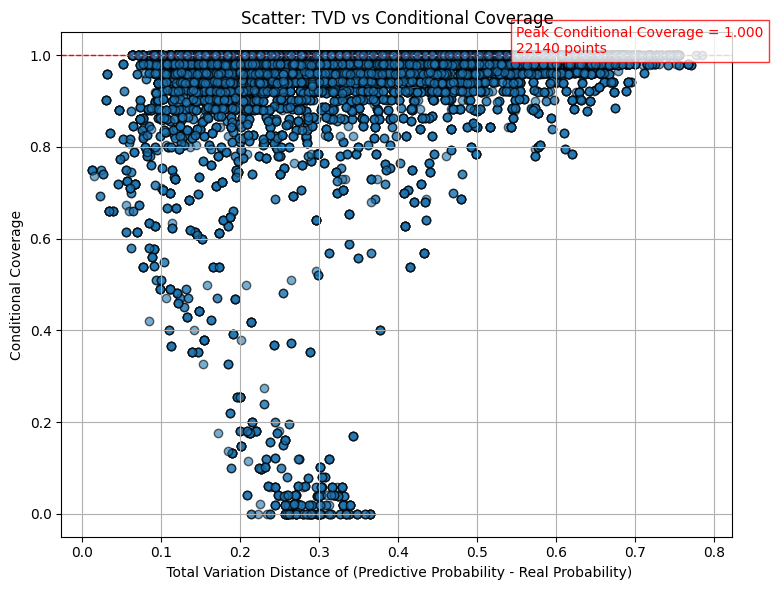

In [7]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.1, k_reg=1, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9335 ± 0.0026
Final Average Prediction Set Size: 1.21 ± 0.00
Final Average Coverage: 0.9361 ± 0.0025
Final Average Real Probability: 0.9066 ± 0.0026


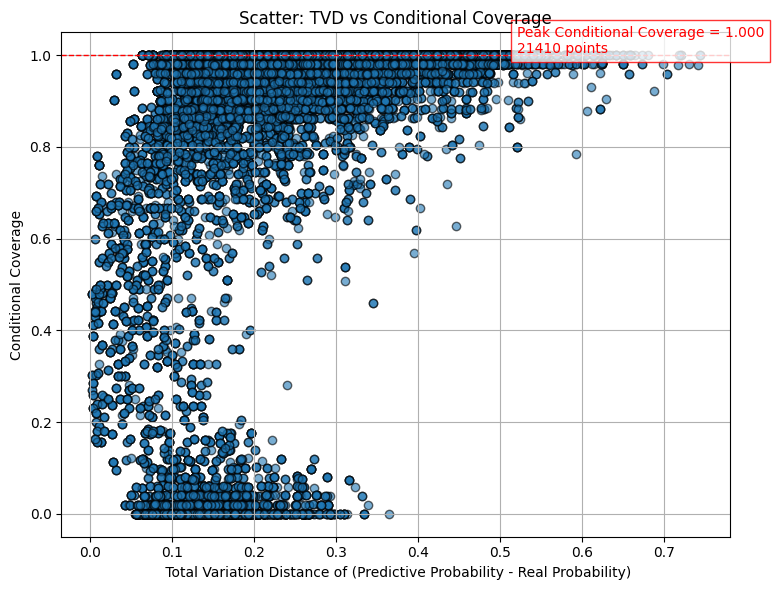

In [8]:
saps_cifar10h_scatter(model, dataset, device, lambda_=2.0, num_runs=10, alpha=0.05)